# Hr Analytics Job Prediction


# Data Set of Hr Department to Predict Employees BehaviourHr EDA and Prediction Employee Behaviour (i.e. whether they leave the company or continue to work) Using Logisics Regression

## About Dataset

- Context

- Hr Data Analytics
This dataset contains information about employees who worked in a company.

- Content
This dataset contains columns: Satisfactory Level, Number of Project, Average Monthly Hours, Time Spend Company, Promotion Last 5 Years, Department, Salary.

- Acknowledgements
You can download, copy and share this dataset for analysis and Predictions employees Behaviour.

- Inspiration

Answer the following questions would be worthy

1- Do Exploratory Data analysis to figure out which variables have a direct and clear impact on employee retention (i.e. whether they leave the company or continue to work).

2- Plot bar charts showing the impact of employee salaries on retention.

3- Plot bar charts showing a correlation between department and employee retention.

4- Now build a logistic regression model using variables that were narrowed down in step 1.

5- Measure the accuracy of the model.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv(r'/Users/chetansingh/Downloads/Shubham/Data Science/09_Logistic_Regression/hr_data.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
data.shape


(14999, 10)

In [6]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [49]:
df=data.duplicated().sum()

In [42]:
data.drop_duplicates()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [48]:
data.shape

(14999, 10)

In [50]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [52]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

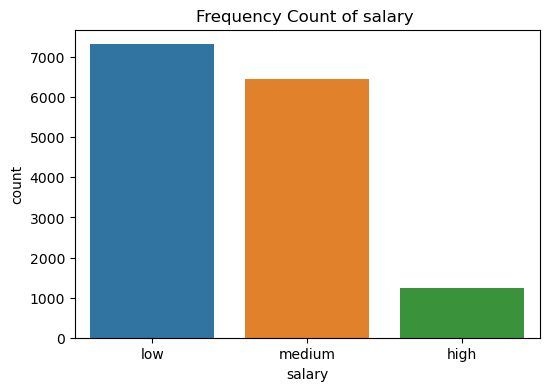

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'salary' , data = data)
plt.title('Frequency Count of salary ')
colors = ['#FFD700', '#8A2BE2']

In [54]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

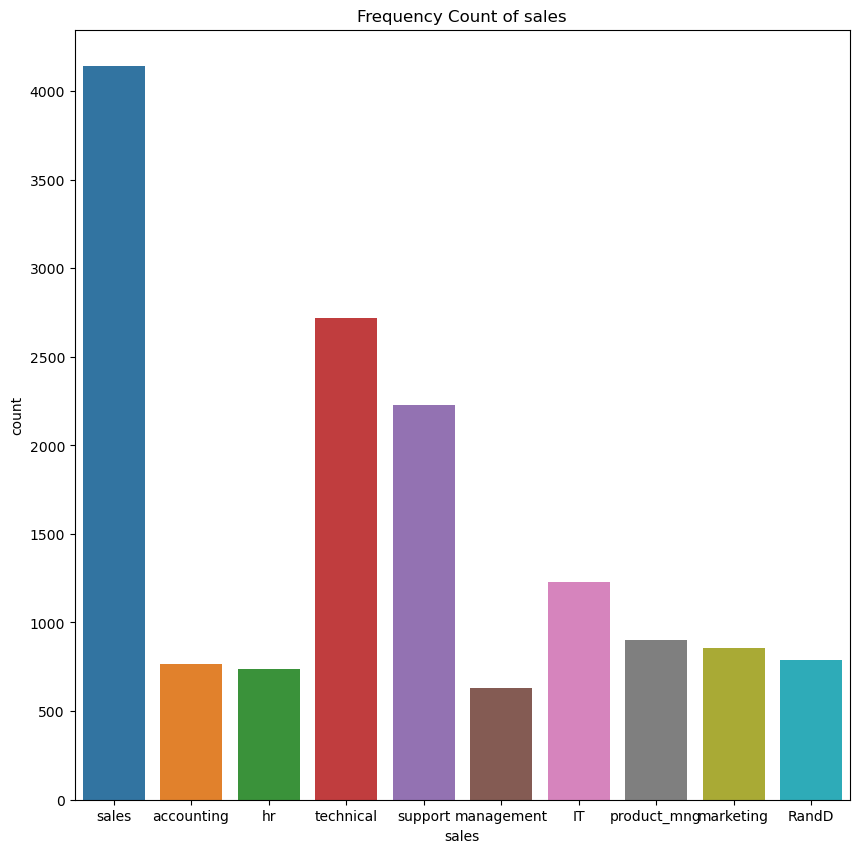

In [55]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'sales' , data = data, orient='v')
plt.title('Frequency Count of sales')
colors = ['#FFD700', '#8A2BE2']

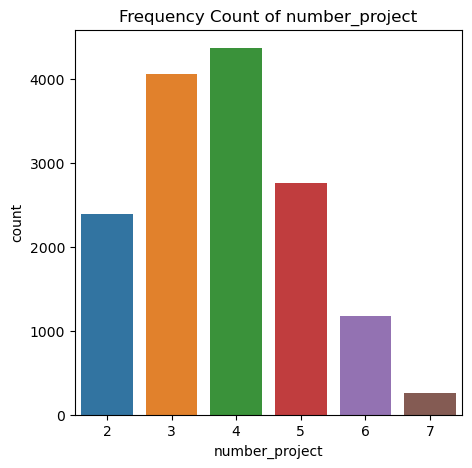

In [57]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'number_project' , data = data)
plt.title('Frequency Count of number_project')
colors = ['#FFD700', '#8A2BE2']

In [58]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

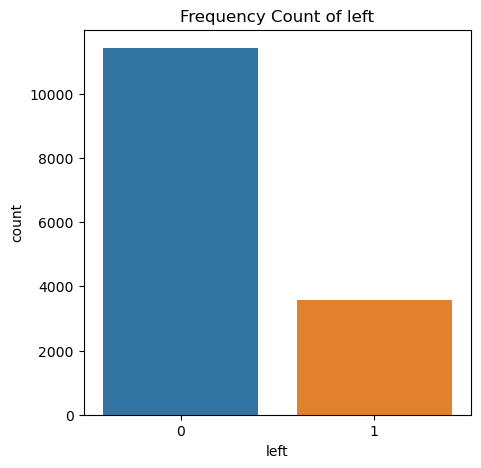

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'left' , data = data)
plt.title('Frequency Count of left')
colors = ['#FFD700', '#8A2BE2']

In [61]:
data['number_project'].unique()

array([2, 5, 7, 6, 4, 3])

In [62]:
data['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

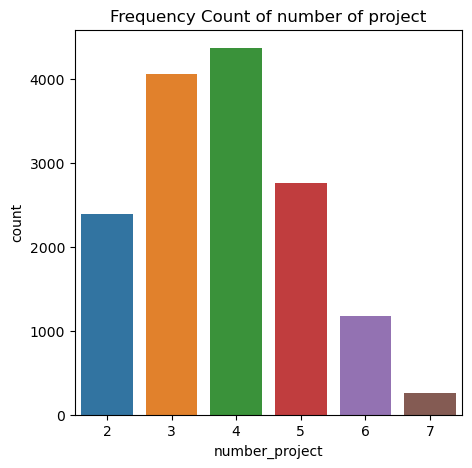

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'number_project' , data = data)
plt.title('Frequency Count of number of project')
colors = ['#FFD700', '#8A2BE2']

In [64]:
data['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [65]:
data['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

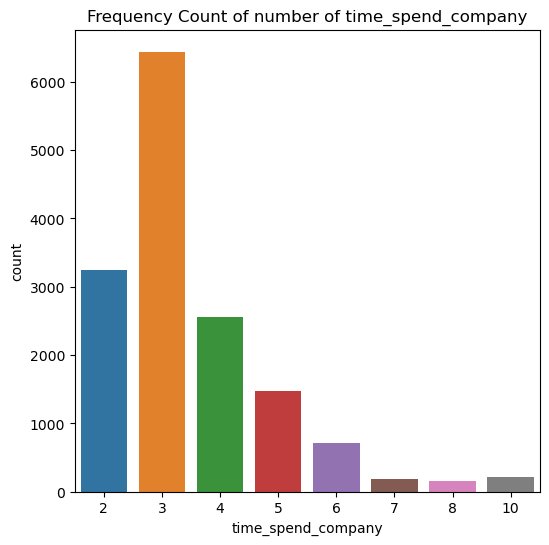

In [66]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'time_spend_company' , data = data)
plt.title('Frequency Count of number of time_spend_company')
colors = ['#FFD700', '#8A2BE2']

In [67]:
data['promotion_last_5years'].unique()


array([0, 1])

In [68]:
data['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

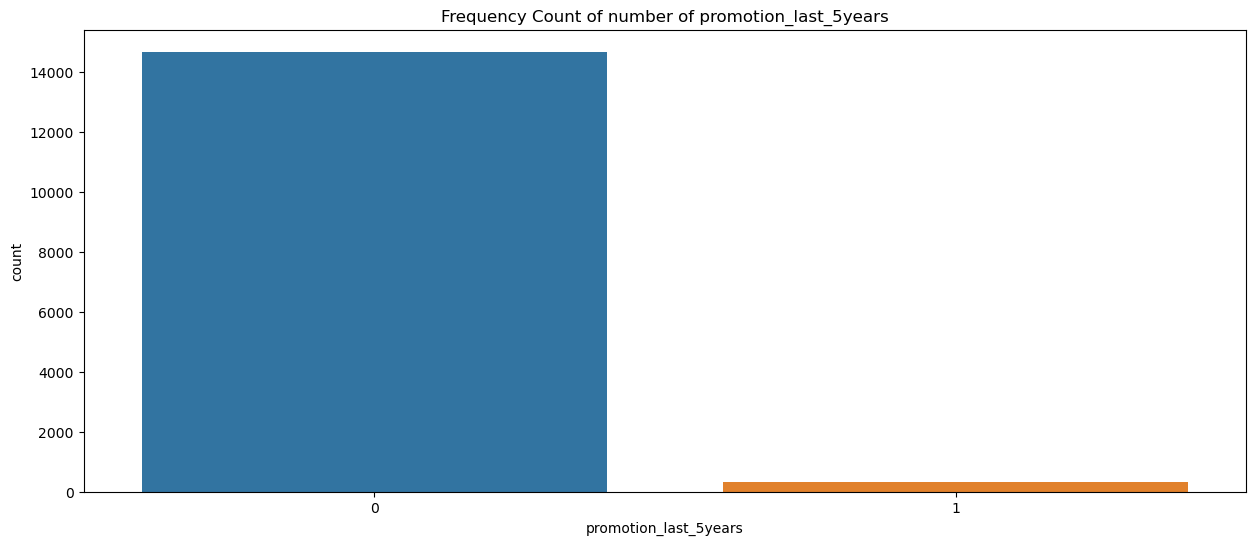

In [69]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'promotion_last_5years' , data = data)
plt.title('Frequency Count of number of promotion_last_5years')
colors = ['#FFD700', '#8A2BE2']

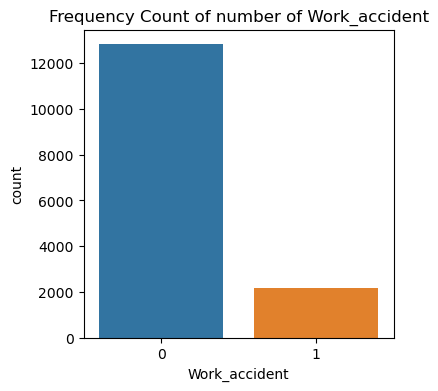

In [70]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'Work_accident' , data = data)
plt.title('Frequency Count of number of Work_accident')
colors = ['#FFD700', '#8A2BE2']

In [106]:
data['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

# Hisplot Level Distribution

<Axes: xlabel='satisfaction_level', ylabel='Count'>

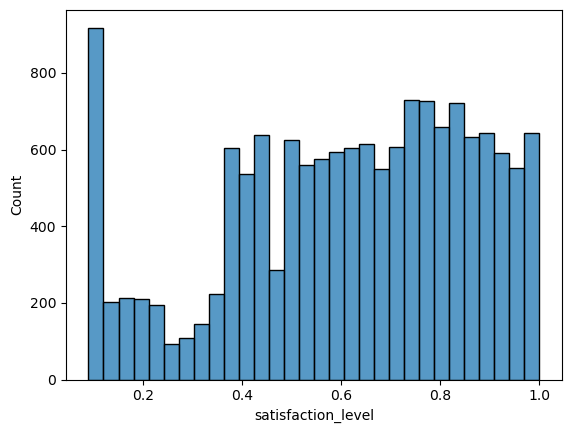

In [107]:
sns.histplot(x=data['satisfaction_level'])

<Axes: xlabel='last_evaluation', ylabel='Count'>

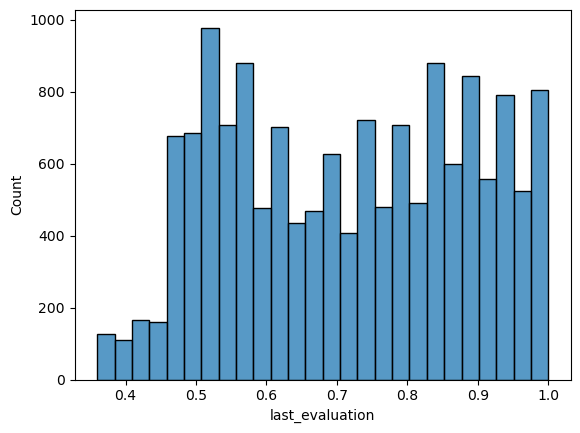

In [108]:
sns.histplot(x=data['last_evaluation'])

<Axes: xlabel='average_montly_hours', ylabel='Count'>

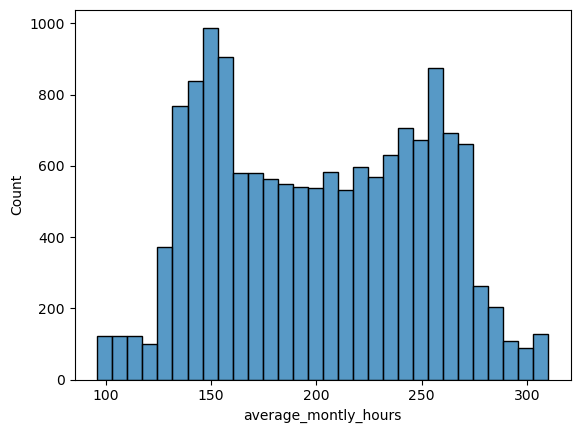

In [109]:
sns.histplot(x=data['average_montly_hours'])

<Axes: xlabel='promotion_last_5years', ylabel='Count'>

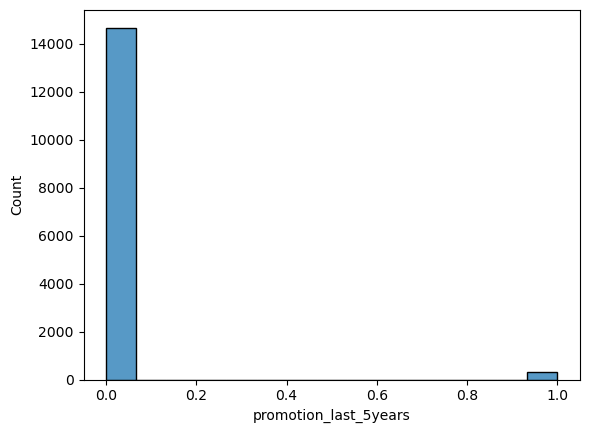

In [110]:
sns.histplot(x=data['promotion_last_5years'])

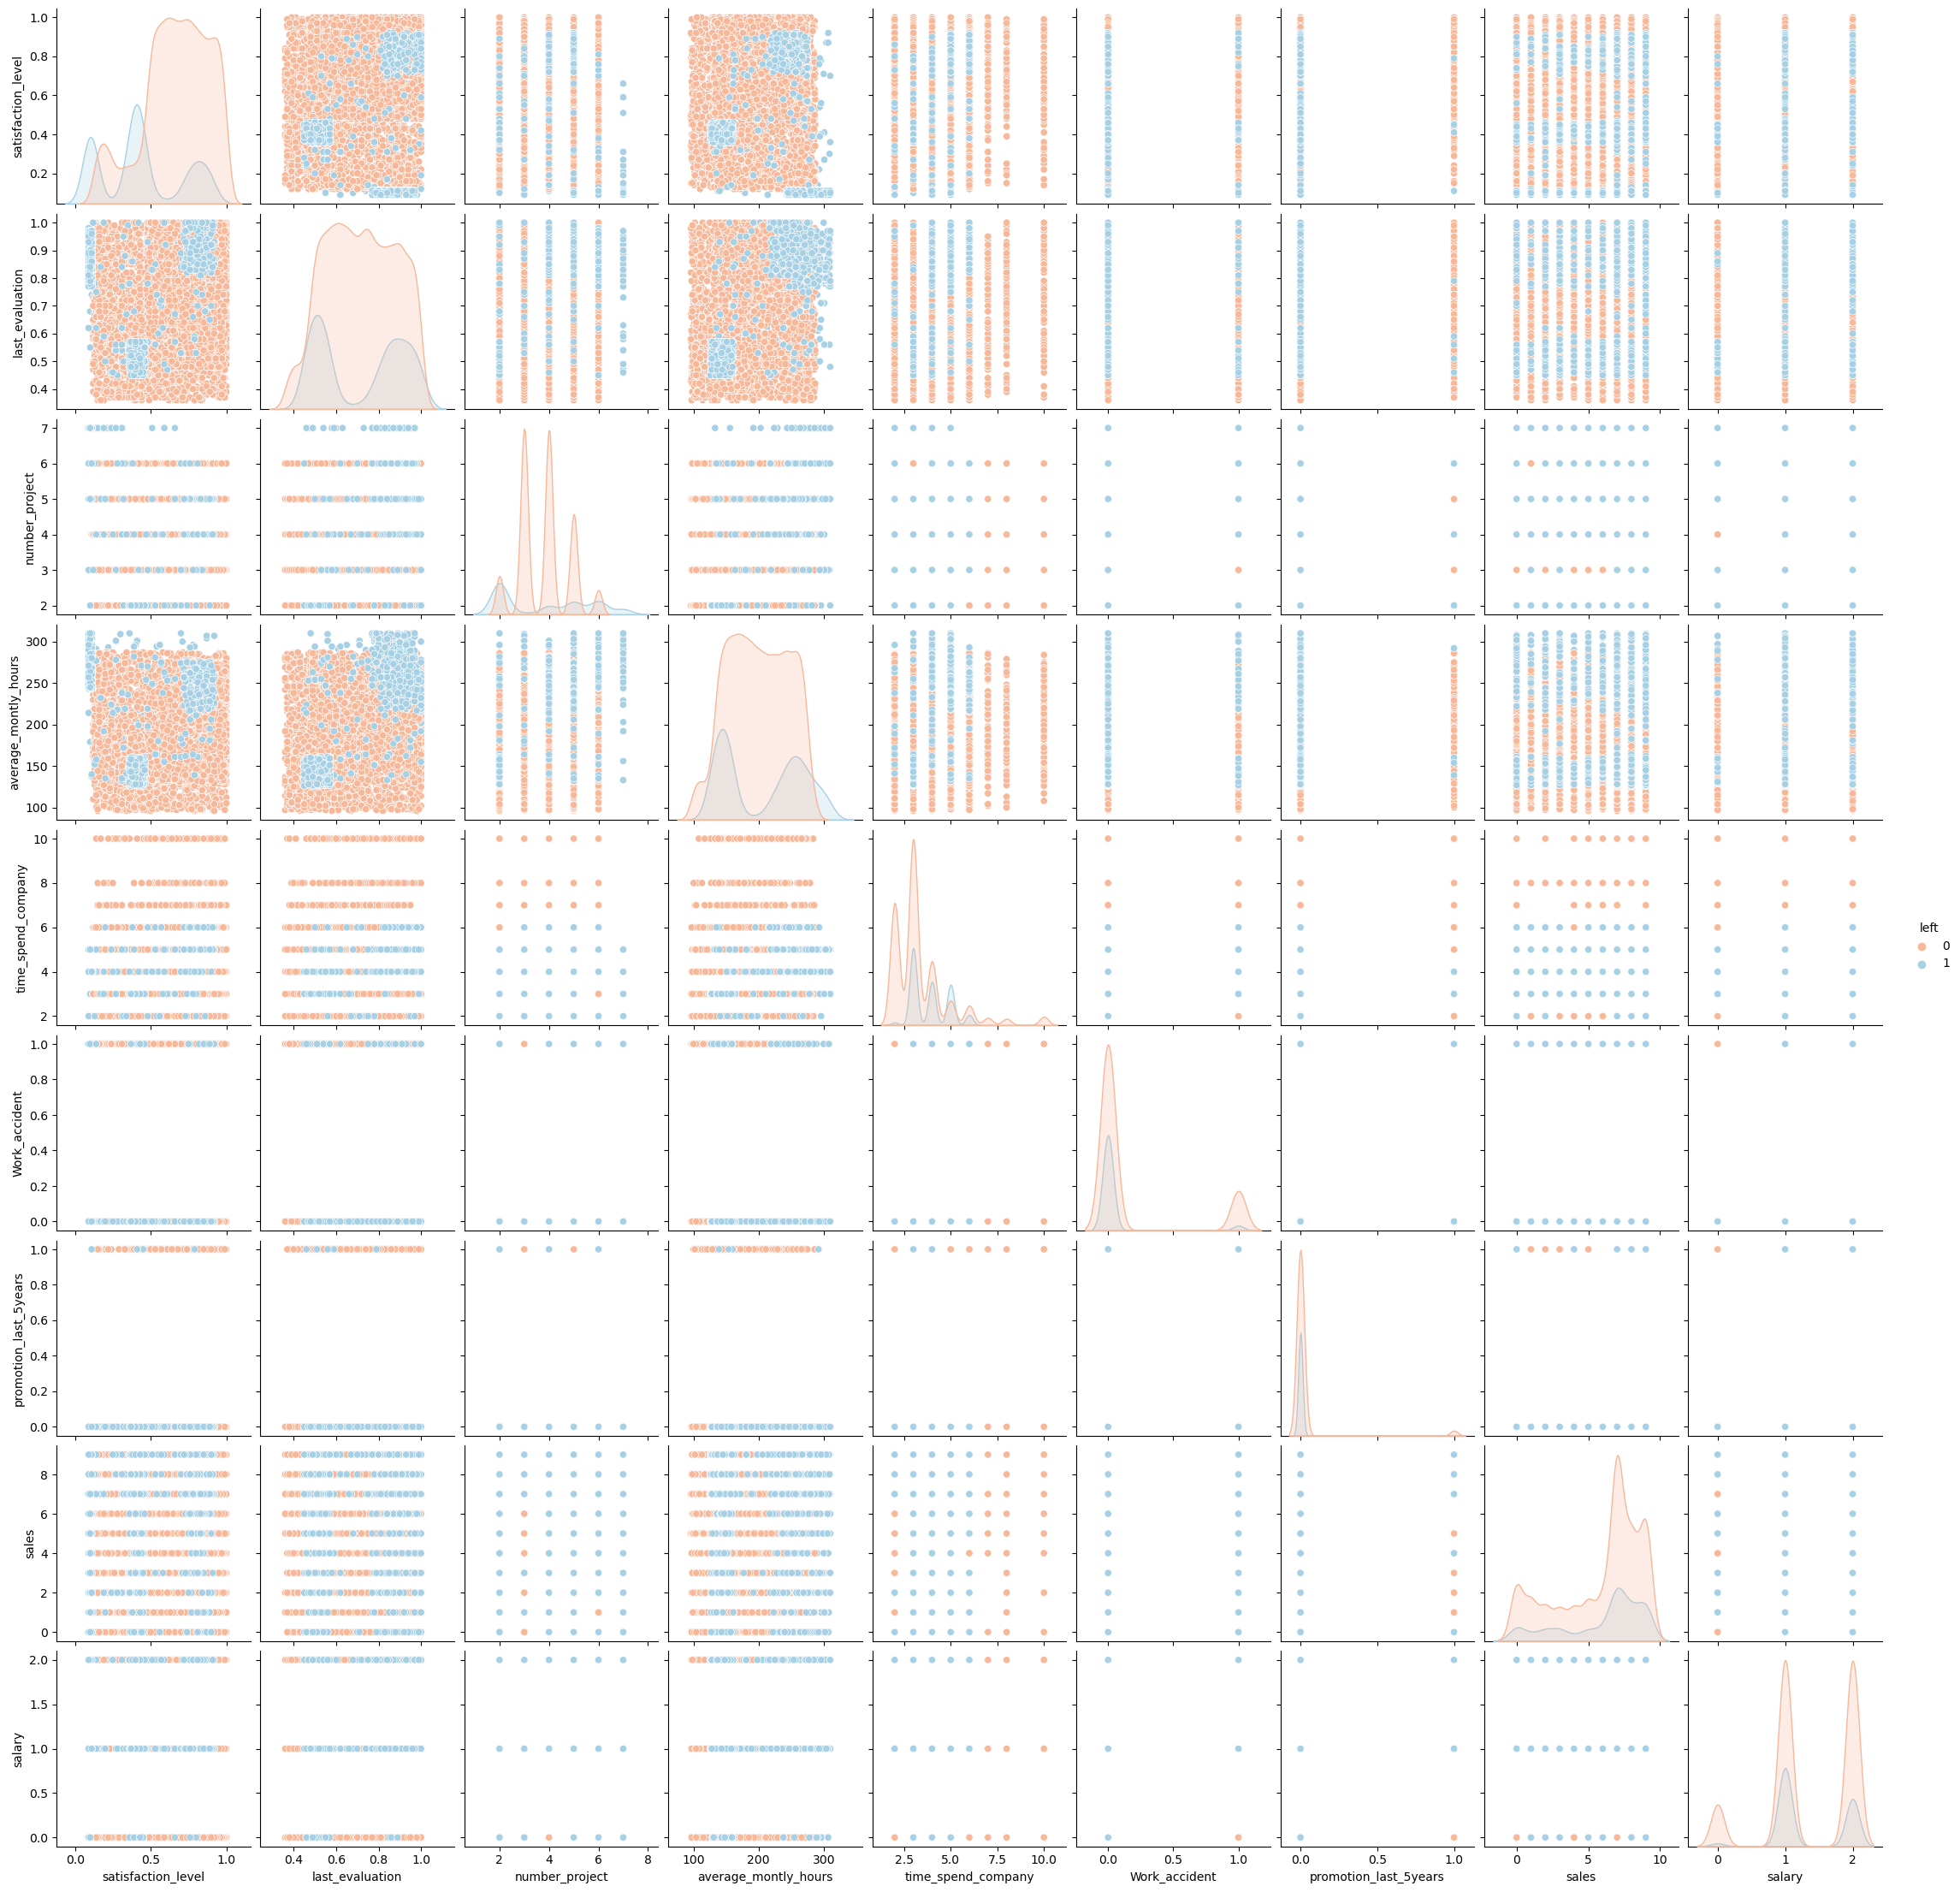

In [111]:
sns.pairplot(data,hue='left',palette='RdBu')

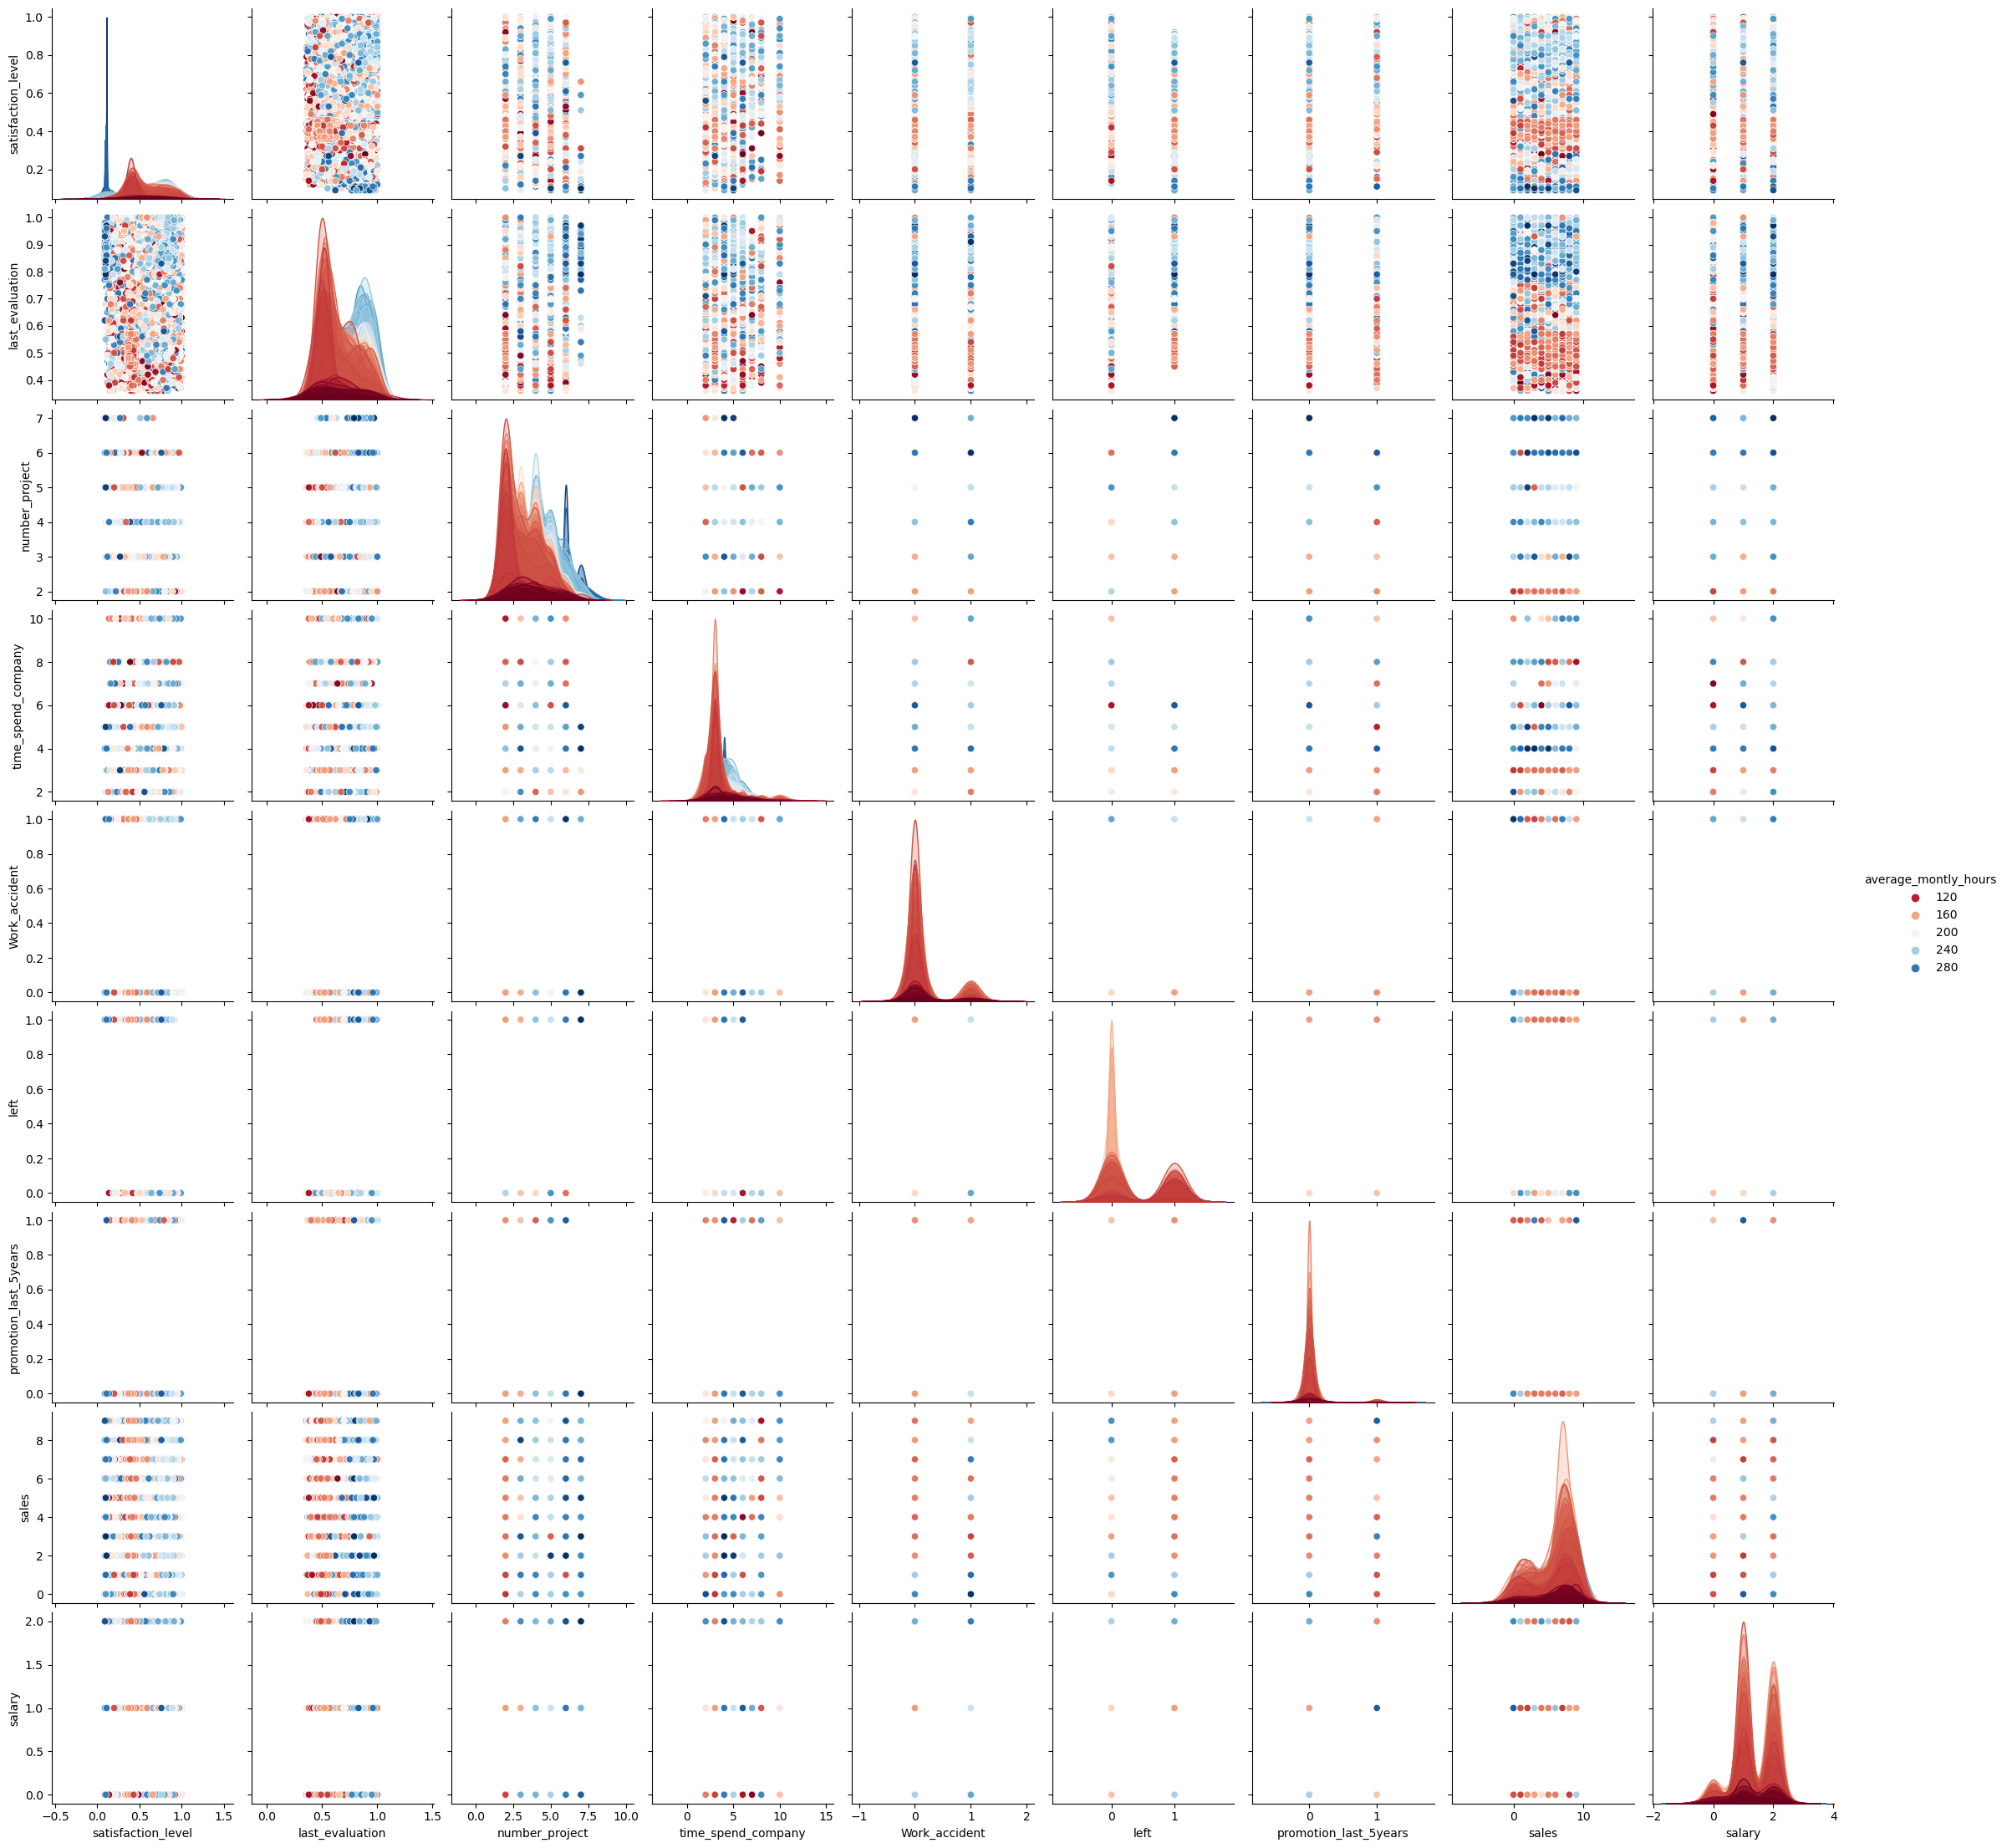

In [112]:
sns.pairplot(data,hue='average_montly_hours',palette='RdBu')

# Satisfaction level vs. People Leaving

<Axes: xlabel='left', ylabel='satisfaction_level'>

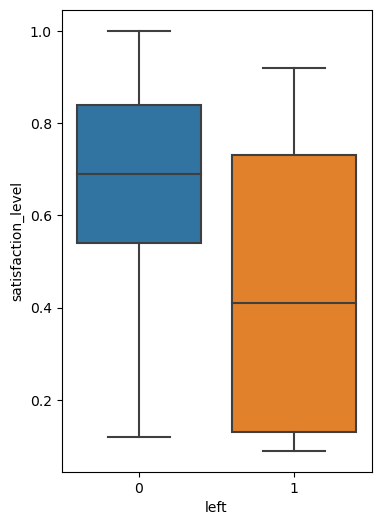

In [113]:
plt.figure(figsize=(4,6))
sns.boxplot(data=data,y='satisfaction_level',x='left')

<Axes: xlabel='left', ylabel='last_evaluation'>

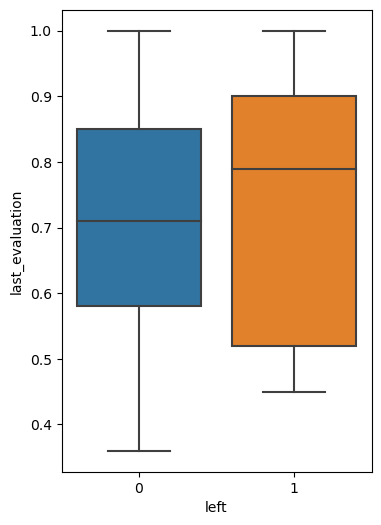

In [114]:
plt.figure(figsize=(4,6))
sns.boxplot(data=data,y='last_evaluation',x='left')

<Axes: xlabel='salary', ylabel='Possibility of leaving'>

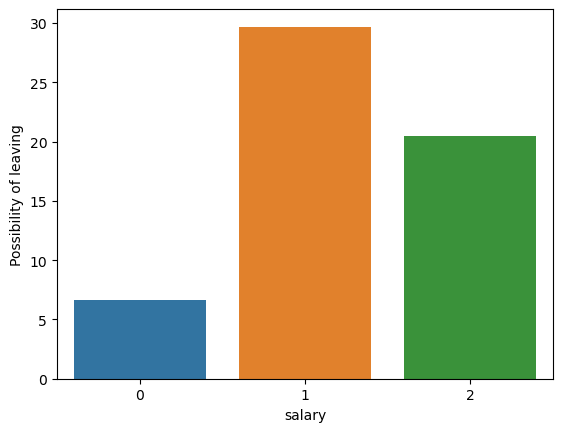

In [115]:
sns.barplot(data = pd.DataFrame(data.groupby('salary').mean()['left']*100).reset_index().sort_values(by='left').rename({'left':'Possibility of leaving'},axis=1),
           x='salary',
           y='Possibility of leaving')

<Axes: xlabel='left', ylabel='time_spend_company'>

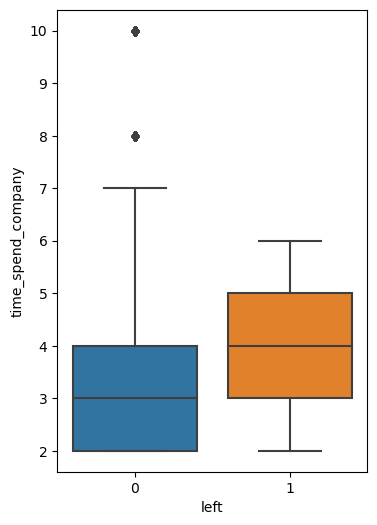

In [116]:
plt.figure(figsize=(4,6))
sns.boxplot(data=data,y='time_spend_company',x='left')

<Axes: xlabel='left', ylabel='average_montly_hours'>

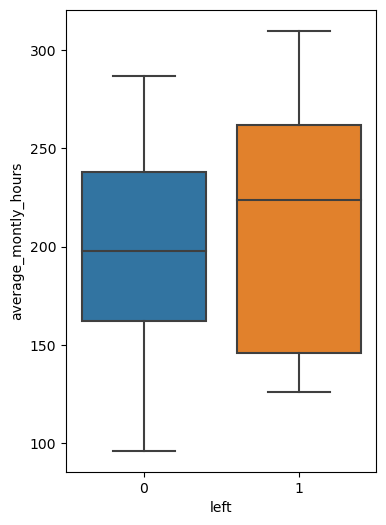

In [117]:
plt.figure(figsize=(4,6))
sns.boxplot(data=data,y='average_montly_hours',x='left')

# Predictive Modelling

In [118]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()
dfs = []

# Assuming 'data' is your original DataFrame
for i in ["sales", 'salary']:
    temp = pd.DataFrame({'Before Encoding': data[i].unique(), 'After Encoding': label_encoder.fit_transform(data[i].unique())})
    dfs.append([temp.sort_values(by=['After Encoding']), i])
    data[i] = label_encoder.fit_transform(data[i])

for i in dfs:
    print(i[1])
    display(i[0])
    print('\n')


sales


,Before Encoding,After Encoding
6,0,0
9,1,1
1,2,2
2,3,3
5,4,4
8,5,5
7,6,6
0,7,7
4,8,8
3,9,9




salary


,Before Encoding,After Encoding
2,0,0
0,1,1
1,2,2


In [126]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [145]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary']

x=data[cols]
y=data['left']

In [146]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [147]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

# Splitting the data into Training data & Testing Data

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.70,random_state=2) 
print(x.shape, x_train.shape, x_test.shape)

(14999, 10) (10499, 10) (4500, 10)


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

LogisticRegression()

In [152]:
from sklearn.metrics import accuracy_score

In [164]:
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test,logreg.predict(X_test))))

Logistic regression accuracy: 0.632


In [165]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [166]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test,rf.predict(X_test))))

Random Forest Accuracy: 0.723


Text(0.5, 1.0, 'Random Forest')

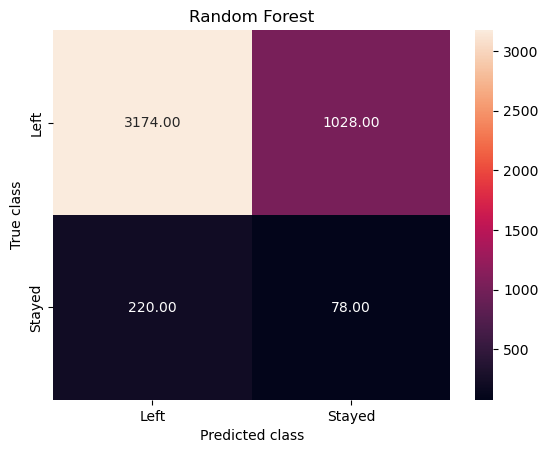

In [167]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

Text(0.5, 1.0, 'Logistic Regression')

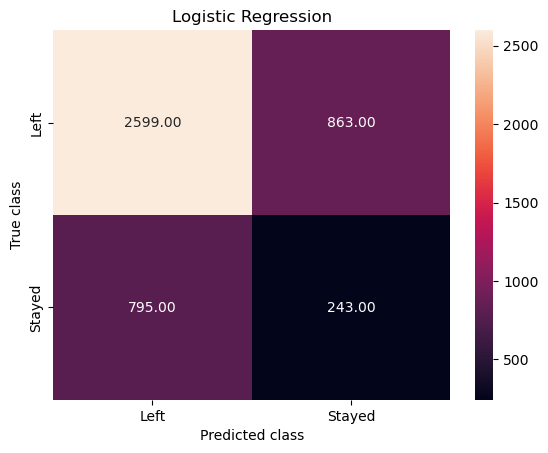

In [168]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',
xticklabels = ["Left", "Stayed"] ,
yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

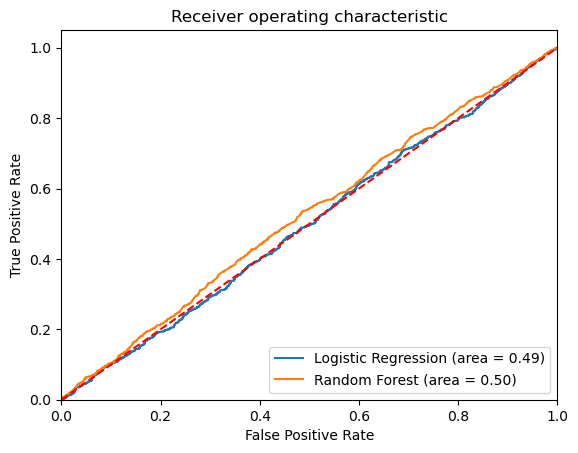

In [169]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

- Logistic regression accuracy: 0.632
- Random Forest Accuracy: 0.723 



                                          Thank you 